# <center> Link between Vaccinations & Education </center> #

![image](https://static.toiimg.com/thumb/msid-73905386,imgsize-719294,width-400,resizemode-4/73905386.jpg)

In [153]:
# import relevant dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [154]:
# read in data
features = "data/training_set_features.csv"
labels = "data/training_set_labels.csv"

info = pd.read_csv(features)
vacc = pd.read_csv(labels)

In [155]:
# merge datasets
df = pd.merge(vacc, info, on = "respondent_id")

In [133]:
# drop irrelevant columns
#columns = info.columns[[1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31, 33, 34, 35, 36, 37]]
columns = df.columns[[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 30, 31, 33, 34, 36, 37]]
drop_columns = columns.tolist()
df = df.drop(drop_columns, axis=1)

In [156]:
# drop null values in columns
df.dropna(inplace = True)

In [160]:
df["race"].value_counts()

White                5179
Black                 456
Hispanic              439
Other or Multiple     363
Name: race, dtype: int64

In [161]:
total_rows = df.shape[0]
white_rows = df[df["race"] == "White"].shape[0]

percentage_white = (white_rows / total_rows) * 100

print(f"The percentage of people who are White in this survey are: {percentage_white}%")

The percentage of people who are White in this survey are: 80.45673450365078%


In [136]:
X = df.drop("seasonal_vaccine", axis = 1)
y = df["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
dummy_model = DummyClassifier(strategy = "most_frequent")
dummy_model.fit(X_train, y_train)
dummy_preds = dummy_model.predict(X_test)
dummy_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv = 5)
cv_results

array([0.52232416, 0.52232416, 0.52232416, 0.52248394, 0.52248394])

## Model has to be more than 52% accutate ##

In [148]:
categorical_columns = ["age_group", "education", "race", "sex", "income_poverty", "marital_status", "hhs_geo_region"]
encoder = OrdinalEncoder()

# Combine X_train and X_test for fitting the encoder
combined_data = pd.concat([X_train[categorical_columns], X_test[categorical_columns]])

# Fit the encoder on the combined data
encoder.fit(combined_data)

# Transform both X_train and X_test using copy
X_train.loc[:, categorical_columns] = encoder.transform(X_train[categorical_columns].copy())
X_test.loc[:, categorical_columns] = encoder.transform(X_test[categorical_columns].copy())


/Users/ginaguerin/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-148-f54882edf3a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, categorical_columns] = encoder.transform(X_train[categorical_columns].copy())
/Users/ginaguerin/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [149]:
simple_log_model = LogisticRegression(random_state = 42 , penalty = "none")
simple_log_model.fit(X_train, y_train)
simple_log_model.predict(X_train)[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [150]:
confusion_matrix(y_train, simple_log_model.predict(X_train))

array([[6858, 1682],
       [2014, 5794]])

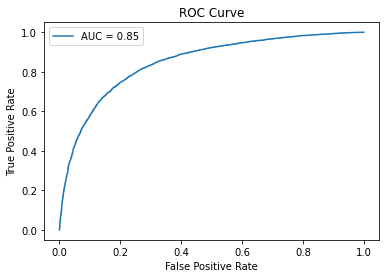

In [151]:
probabilities = simple_log_model.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities)

auc_value = roc_auc_score(y_train, probabilities)

plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()